#**LINEAR REGRESSION**

####**ABOUT DATASET**

The dataset to use for the creation of a Linear Regression model is a dataset that helps predict the amount of net electrical energy per hour generated by a power plant. The dataset is one of those belonging to the UCI Machine Learning Repositories, and can be found [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

**Numeric Features:**

* `Temperature`: It is represented by the letters AT, and is related to the ambient temperature at the time of sampling.
* `Ambient Pressure`: It is represented by the letters AP, and is related to the ambient pressure at the time of sampling.
* `Relative Humidity`: It is represented by the letters RH, and is related to the ambient relative humidity at the time of sampling.
* `Exhaust Vacuum`: It is represented by the letter V, and is related to the exhaust vacuum at the time of sampling.

**Output:**

* `Electrical energy`: It is represented by the letters EP, and is related to the net hourly electrical energy output of the plant.

This dataset was chosen in such a way that one or more of its input variables had a direct linear correlation with the output.


####**LINEAR REGRESSION WITH SCKIT LEARN**

First, some necessary libraries are imported and the Excel file corresponding to the dataset to be used is loaded. The first row of the dataset contains the titles of each column.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

!git clone https://github.com/DanielaGomez98/Linear_Regression_ML.git
dataset = pd.read_excel('/content/Linear_Regression_ML/power_plant.xlsx', header=0, index_col=False)
dataset

Cloning into 'Linear_Regression_ML'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Important characteristics about the dataset are extracted, to know the amount of missing data in each of the columns, the type of data they contain and some statistics.

In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


The linear correlation between each of the input variables and the output is found, in order to establish whether it is necessary to use all the columns of the dataset when creating and analyzing the model, or to omit some that are not essential.

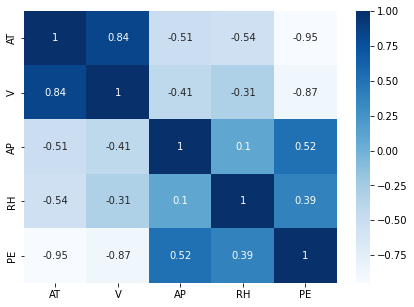

In [ ]:
plant = dataset.corr(method="pearson")   #Linear correlation
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(plant, cmap='Blues', annot=True, ax=ax)
plt.show()
#According to the results, the input variables that have the highest correlation with the output (PE) are AT and V.

As part of the exploratory analysis, each of the input variables vs. the other variables is plotted, where the color of the points is given by the value of the output variable. This is done in order to establish whether the values are easily separable for each output value.

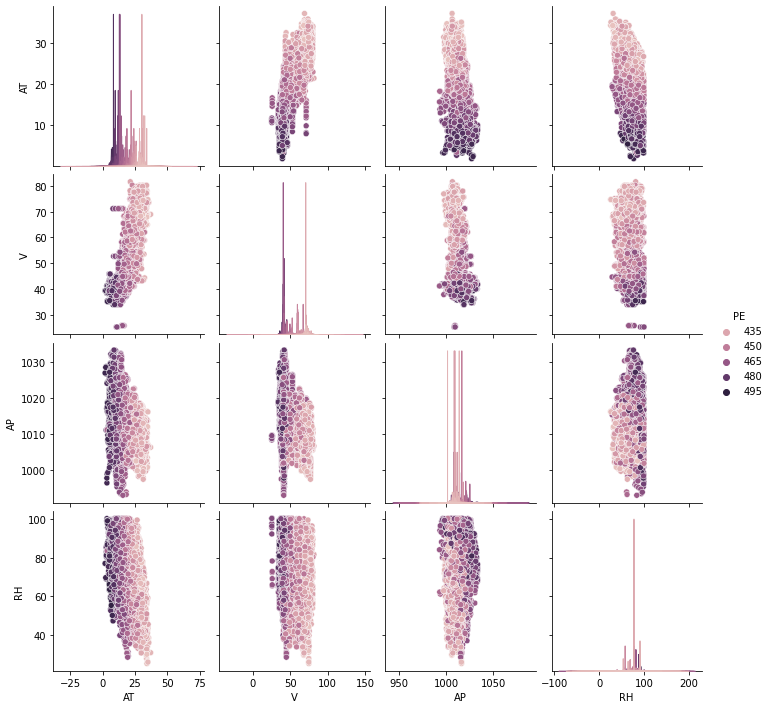

In [ ]:
sns.pairplot(dataset, hue="PE")

The graph of two of the input variables vs. the output is done, to better observe the distribution of the data.

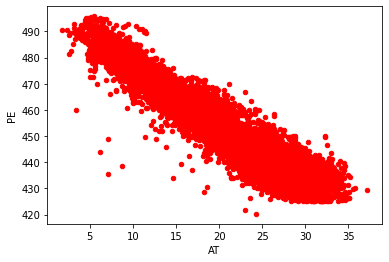

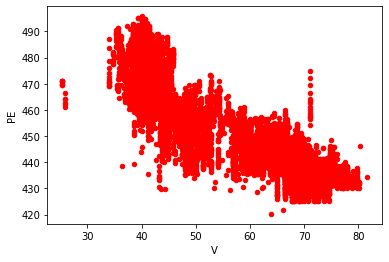

In [ ]:
#The input variables that have the highest correlation with the output are taken into account.
dataset.plot(x = 'AT', y = 'PE', kind = 'scatter', color='red')
dataset.plot(x = 'V', y = 'PE', kind = 'scatter', color='red')

The dataset is divided into input and output data, taking the first four columns of the dataset (from 0 to 3) as input, and the last column as output. Also, the size of both the input and output data is printed.

In [ ]:
x = dataset.iloc[:, 0:4]
y = dataset.iloc[:, 4]

print(x.shape)
print(y.shape)

(9568, 4)
(9568,)


Input data is normalized, using Scikit Learn's MinMaxScaler method.

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
print(x)

             0         1         2         3
0     0.372521  0.291815  0.771591  0.638204
1     0.662040  0.669039  0.671863  0.449330
2     0.093484  0.249822  0.476862  0.892493
3     0.539660  0.568683  0.429349  0.684718
4     0.255241  0.216014  0.404355  0.952547
...        ...       ...       ...       ...
9563  0.420397  0.432918  0.522643  0.877212
9564  0.322380  0.245907  0.761693  0.552547
9565  0.835977  0.871352  0.495669  0.146381
9566  0.642210  0.784520  0.518931  0.493700
9567  0.560623  0.661210  0.602326  0.567158

[9568 rows x 4 columns]


The data is partitioned into training and validation data. In this case, 70% of the data corresponds to training and the remaining 30% to validation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

A linear regression model is created using Scikit Learn's LinearRegression method, which, according to the official page, fits a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. After that, the linear regression model is trained, taking into account the training data.

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

First, the resulting linear regression model coefficients (also known as parameters, the factors a input variable is multiplied by) are found and printed along with the intercept (the location where the slope intercepts the Y-axis), which, in this case, correspond to the updated weights and the bias, respectively. Next, the prediction is made with the validation data and the input validation data is plotted (of the first column), along with the actual output and the predicted output.

linear_reg.coef_: [-69.43892367 -13.39368797   2.6196715  -11.72399702]
linear_reg.intercept_: 502.5367797461049


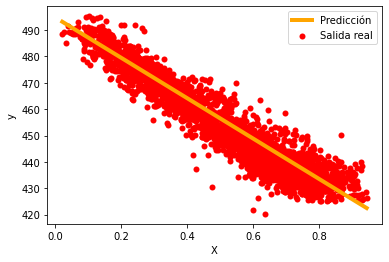

In [ ]:
print("linear_reg.coef_: {}".format(linear_reg.coef_))
print("linear_reg.intercept_: {}".format(linear_reg.intercept_))

y_pred = linear_reg.predict(x_test)
x1 = x_test.iloc[:, 0].max()
x2 = x_test.iloc[:, 0].min()
y1 = y_pred.max()
y2 = y_pred.min()
plt.scatter(x_test.iloc[:, 0], y_test, color='red', linewidths=0.01, label='Salida real')
#Estimated Regression Line: the straight line that best fits a set of scattered data points.
plt.plot([x1, x2], [y2, y1], linewidth=4, color='orange', label='Predicción')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

The values of the first 10 validation outputs are compared to the first 10 predicted outputs.

In [ ]:
y_testa = np.array(y_test)
for i in range(10):
  print("Electrical energy output (Prediction):", y_pred[i])
  print("Electrical energy output (Real):", y_testa[i], '\n')

Electrical energy output (Prediction): 445.3156302890816
Electrical energy output (Real): 441.61 

Electrical energy output (Prediction): 444.1782388766326
Electrical energy output (Real): 444.19 

Electrical energy output (Prediction): 449.24629555490765
Electrical energy output (Real): 445.27 

Electrical energy output (Prediction): 478.47068779796297
Electrical energy output (Real): 471.32 

Electrical energy output (Prediction): 468.0734179035255
Electrical energy output (Real): 471.96 

Electrical energy output (Prediction): 437.9939393463858
Electrical energy output (Real): 430.32 

Electrical energy output (Prediction): 483.54803000224086
Electrical energy output (Real): 483.56 

Electrical energy output (Prediction): 487.221310924216
Electrical energy output (Real): 489.96 

Electrical energy output (Prediction): 445.05402422715343
Electrical energy output (Real): 444.1 

Electrical energy output (Prediction): 465.9238604138363
Electrical energy output (Real): 467.45 



Some important evaluation metrics are calculated and printed to know the quality of the model:

* **Max Absolute Error:** Absolute value of the maximum difference between a predicted value and an actual value.

\begin{equation}
M(y,\hat{y})=max(|y_{i}-\hat{y_{i}}|)
\end{equation}

* **Mean Absolute Error:** Average of the sum of all residuals (absolute value of the differences) between the predicted values and the actual values.

\begin{equation}
MAE(y,\hat{y})=\frac{1}{n}\sum_{i=1}^n |y_{i}-\hat{y_{i}}|
\end{equation}

* **Mean Squared Error:** Average of the sum of the squares of all residuals (differences) between the predicted values and the actual values. Squaring each difference allows to give more weight to larger errors. The idea is to minimize this value.

\begin{equation}
MSE(y,\hat{y})=\frac{1}{n}\sum_{i=1}^n(y_{i}-\hat{y_{i}})^{2}
\end{equation}

* **Root of Mean Squared Error:** Root of Mean Squared Error metric. This is done with the aim of not obtaining a squared error value.

\begin{equation}
RMSE(y,\hat{y})=\sqrt{\frac{1}{n}\sum_{i=1}^n(y_{i}-\hat{y_{i}})^{2}}
\end{equation}

* **Residual sum of squares:** Sum of the squares of all residuals (vertical distances between the data points and the line of regression) between the predicted values and the actual values. 

\begin{equation}
RSS(y,\hat{y})=\sum_{i=1}^n(y_{i}-\hat{y_{i}})^{2}
\end{equation}

* **Coefficient of Determination:** It is used to evaluate how well the model fits the data. Does not apply to nonlinear regression models. It is equivalent to the correlation, which expresses the linear relationship between the input variable and the output variable. Its ideal value is R^2 = 1.

\begin{equation}
RSS(y,\hat{y})=1-\frac{\sum_{i=1}^n(y_{i}-\hat{y_{i}})^{2}}{\sum_{i=1}^n(y_{i}-\bar{y})^{2}}
\end{equation}

In [ ]:
M = max_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)         #mean_squared_error(y_test, y_pred, squared=False)
R2 = r2_score(y_test, y_pred)
RSS = MSE*len(y_pred)

In [ ]:
print("Max Absolute Error:", M)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("Residual sum of squares:", RSS)

#The correlation coefficient denoted as 𝑅², is used to describe the precision or degree of fit in a regression. 
print("\nCoefficient of Determination:", R2)
print("   Training set R^2 score: {:.2f}".format(linear_reg.score(x_train, y_train)))
print("   Test set R^2 score: {:.2f}".format(linear_reg.score(x_test, y_test)))

Max Absolute Error: 26.13932308076926
Mean Absolute Error: 3.600100863237155
Mean Squared Error: 20.025488269290744
Root Mean Squared Error: 4.474984722799704
Residual sum of squares: 57493.176821133726

Coefficient of Determination: 0.9312066184350413
   Training set R^2 score: 0.93
   Test set R^2 score: 0.93


####**CUSTOM LINEAR REGRESSION**

This part follows the procedure performed on the page [Coding Linear Regression from Scratch](https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902), modifying the necessary parameters to adjust to the dataset that is being used.

First, two empty lists are created corresponding to the mean and standard deviation for each feature.

In [ ]:
#Variables to store mean and standard deviation for each feature
mu = []
std = []

A function is created where the Excel file corresponding to the dataset is loaded and the *normalize* function is called, which is responsible for normalizing all the data. The *plot_data* function is also called, where each of the inputs vs. the output is plotted. Furthermore, the data is partitioned into training and validation data, with 30% of the data for the latter.

In [ ]:
def load_data(filename):
  df = pd.read_excel(filename, header=0, index_col=False)
  data = np.array(df, dtype=float)
  x = data[:, :4]
  y = data[:, -1]
  plot_data(data[:, :4], data[:, -1])
  normalize(data)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)
  
  return x, y, x_train, x_test, y_train, y_test

A function is created where each of the input variables is plotted with the output, thus knowing the distribution of the data. This function is called in the *load_data* function.

In [ ]:
def plot_data(x, y):
  labels = ['Temperature (AT)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)', 'Relative Humidity (RH)']
  for i in range(0, x.shape[1]):
    plt.xlabel(labels[i])
    plt.ylabel('Electrical energy (PE)')
    plt.plot(x[:,i], y, 'bo', linewidth=0.01)
    plt.show()

The function is created where the data is normalized, taking into account the mean and the standard deviation of each column of the dataset. This function is called in the *load_data* function. To normalize the data, the following equation is used:

\begin{equation}
Z=\frac{x-\mu}{\sigma}
\end{equation}

Where μ is the mean and σ is the standard deviation.

In [ ]:
def normalize(data):
  for i in range(0, data.shape[1]-1):
    data[:, i] = ((data[:, i] - np.mean(data[:, i]))/np.std(data[:, i]))
    mu.append(np.mean(data[:, i]))
    std.append(np.std(data[:, i]))

The function is created to define the hypothesis (prediction), taking into account the following equation:

\begin{equation}
h\theta(x)=\theta0 + \theta1 x1 + \theta2 x2 + \theta3 x3 + \theta4 x4
\end{equation}

It is important to remember that we have 4 input variables.

As you can see, this equation is very similar to the slope equation (*y = mx + b*), which defined the predicted output in the previous section. θ0 would be the intercept and the other values of θ would be the coefficients.

In [ ]:
def h(x, theta):
  return np.matmul(x, theta)   #Matrix product of two arrays.

The function where the cost function is defined is created, taking into account the following equation:

\begin{equation}
J(\theta_{1})=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^{2}
\end{equation}

Where *m* is the number of samples (rows).

As you can see, this equation is very similar to the equation of RMSE metric, explained in the previous section.

In [ ]:
def cost_function(x, y, theta):
  return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

The function where the descending gradient is defined is created. Gradient descent is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function. This function follows the following equation to update the parameters (*theta*):

\begin{equation}
\theta_{j}:=\theta_{j}-\alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})
\end{equation}

For *j = 0* and *j = 1*

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
  m = x.shape[0]
  J_all = []

  for _ in range(num_epochs):
    #The hypothesis is evaluated.
    h_x = h(x, theta)
    #The derivative of the cost function is calculated.
    cost_ = (1/m)*(x.T@(h_x - y))               
    #Parameters update (we multiply the derivative of the cost function with the learning rate(α), and subtract it from the present value of the parameters(θ),
    #to get the new updated parameters(θ))
    theta = theta - (learning_rate)*cost_ 
    #All calculated costs are entered into a list.       
    J_all.append(cost_function(x, y, theta))
  
  return theta, J_all

The function where the calculated costos are plotted is created.

In [ ]:
def plot_cost(J_all, num_epochs):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(num_epochs, J_all, 'b', linewidth = "4")
  plt.show()

A function is defined to test the proper functioning of the code, using the same equation as the hypothesis. 

In [ ]:
def test(theta, x):
  x[0] = (x[0] - mu[0])/std[0]
  x[1] = (x[1] - mu[1])/std[1]
  x[2] = (x[2] - mu[2])/std[2]
  x[3] = (x[3] - mu[3])/std[3]

  y = theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3]
  print("Electrical energy output (Prediction):", y)

The dataset to be loaded is indicated, passing it as a parameter to the *load_data* function. With this, the input and output data are obtained, as well as the partitioned training and validation data.

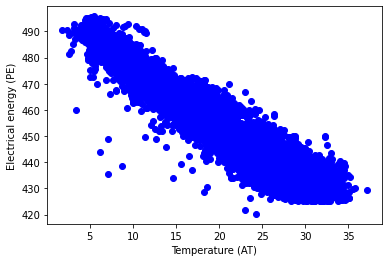

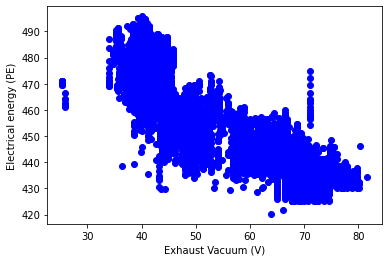

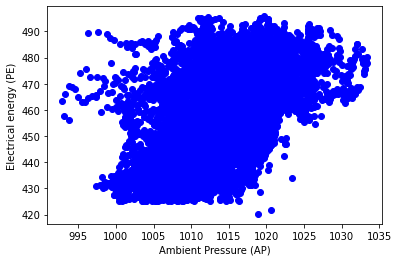

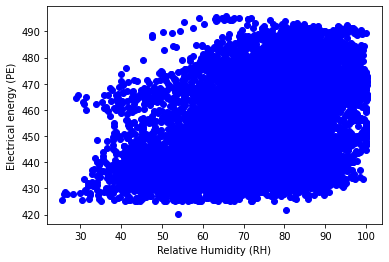

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x, y, x_train, x_test, y_train, y_test = load_data("/content/power_plant.xlsx")

A column of 1's is added to the input data, in order to do the matrix multiplication between the input data and the theta data.

In [ ]:
x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))
y_train = np.reshape(y_train, (6697, 1))
y_test = np.reshape(y_test, (2871, 1))
theta = np.zeros((x_train.shape[1], 1))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(theta.shape)

(6697, 5)
(2871, 5)
(6697, 1)
(2871, 1)
(5, 1)


The value for the learning rate and the number of epochs is defined. In addition, the values for theta and the costs in each epoch are obtained, evaluating the corresponding parameters in the descending gradient function; and the value for the total cost, evaluating the corresponding parameters in the cost function.

In [ ]:
learning_rate = 0.1
num_epochs = 600    
theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)
J = cost_function(x_train, y_train, theta)
pred1 = h(x_test, theta)
#The total cost value is printed.
print("Cost: ", J, '\n')
#Theta values are printed.
print("Parameters:\n", theta, '\n')
#The prediction is printed, which is found by evaluating the values of 'x' and 'theta' in the hypothesis.
print("Prediction:\n", pred1[:10])

Cost:  [[10.54357488]] 

Parameters:
 [[ 4.54359068e+02]
 [-1.46444319e+01]
 [-3.03915146e+00]
 [ 3.87728104e-01]
 [-2.28961378e+00]] 

Prediction:
 [[445.31346627]
 [444.18129529]
 [449.24955455]
 [478.46403288]
 [468.07441209]
 [437.99446027]
 [483.5405033 ]
 [487.21741845]
 [445.05222561]
 [465.93028777]]


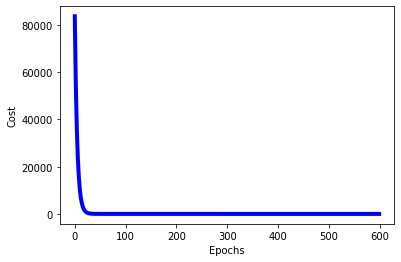

In [ ]:
#For testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

The values of the first 10 validation outputs are compared to the first 10 predicted outputs.

In [ ]:
for i in range(10):
  test(theta, x_test[i, 1:len(x_test)])
  print("Electrical energy output (Real):", y_test[i], '\n')

Electrical energy output (Prediction): [445.31346627]
Electrical energy output (Real): [441.61] 

Electrical energy output (Prediction): [444.18129529]
Electrical energy output (Real): [444.19] 

Electrical energy output (Prediction): [449.24955455]
Electrical energy output (Real): [445.27] 

Electrical energy output (Prediction): [478.46403288]
Electrical energy output (Real): [471.32] 

Electrical energy output (Prediction): [468.07441209]
Electrical energy output (Real): [471.96] 

Electrical energy output (Prediction): [437.99446027]
Electrical energy output (Real): [430.32] 

Electrical energy output (Prediction): [483.5405033]
Electrical energy output (Real): [483.56] 

Electrical energy output (Prediction): [487.21741845]
Electrical energy output (Real): [489.96] 

Electrical energy output (Prediction): [445.05222561]
Electrical energy output (Real): [444.1] 

Electrical energy output (Prediction): [465.93028777]
Electrical energy output (Real): [467.45] 



A function is created to once again provide the *x* and *y* data for both training and validation, to subsequently make a graph where the real output is compared with the predicted output.

In [ ]:
def load_data_graph(filename):
  df = pd.read_excel(filename, header=0, index_col=False)
  data = np.array(df, dtype=float)
  x = data[:, :4]
  y = data[:, -1]
  normalize(data)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)
  
  return x, y, x_train, x_test, y_train, y_test

The input validation data is plotted (of the first column), along with the actual output and the predicted output.

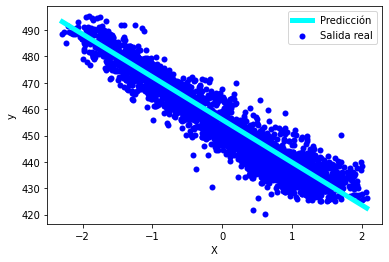

In [ ]:
x, y, x_train, x_test, y_train, y_test = load_data_graph("/content/power_plant.xlsx")
x1 = x_test[:, 0].max()
x2 = x_test[:, 0].min()
y1 = pred1.max()
y2 = pred1.min()
plt.scatter(x_test[:, 0], y_test,  color='blue', linewidths=0.01, label='Salida real')
plt.plot([x1, x2], [y2, y1], color='cyan', linewidth=5, label='Predicción')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

The same evaluation metrics are implemented as in the previous section.

In [ ]:
M1 = max_error(y_test, pred1)
MAE1 = mean_absolute_error(y_test, pred1)
MSE1 = mean_squared_error(y_test, pred1)
RMSE1 = np.sqrt(MSE1)
RSS1 = MSE1*len(pred1)
R21 = r2_score(y_test, pred1)

In [ ]:
print("Max Absolute Error:", M1)
print("Mean Absolute Error:", MAE1)
print("Mean Squared Error:", MSE1)
print("Root Mean Squared Error:", RMSE1)
print("Residual sum of squares:", RSS1)
print("Coefficient of Determination:", R21)

Max Absolute Error: 26.13653161661341
Mean Absolute Error: 3.600472807884176
Mean Squared Error: 20.026782741931395
Root Mean Squared Error: 4.475129354770809
Residual sum of squares: 57496.893252085036
Coefficient of Determination: 0.9312021715447035


####**CUSTOM LINEAR REGRESSION CHANGING THE OPTIMIZER**

The optimizer to use in this section is the [ADAM optimizer](https://keras.io/api/optimizers/adam/). Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order (estimate of the mean) and second-order moments (estimate of the variance). Using these moment estimates we can update the parameters, given an appropriate learning rate. The update rule of Adam is a combination of momentum and the RMSProp optimizer.

Two values that Adam depend on are β₁ and β₂:
* **β₁:** is a float value or a constant float tensor, and it represents the exponential decay rate for the 1st moment estimates. Its default value is 0.9.
* **β₂:** is a float value or a constant float tensor, and it represents the exponential decay rate for the 2nd moment estimates. Its default value is 0.999.

The above is defined by the equations:

\begin{equation}
m_{t}=\beta_{1}m_{t-1}+(1-\beta_{1})g_{t}
\end{equation}
\begin{equation}
v_{t}=\beta_{2}v_{t-1}+(1-\beta_{2})g_{t}^{2}
\end{equation}

On a given iteration *t*, we can calculate the moving averages based on parameters β₁, β₂, and gradient *gt*. Then, we need an extra step to correct the parameters:

\begin{equation}
\hat{m}_{t}=\frac{m_{t}}{1-\beta_{1}^{t}}
\end{equation}
\begin{equation}
\hat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}}
\end{equation}

Finally, we can update the parameters (weights) based on the calculated moving averages with a step size η (learning rate):

\begin{equation}
w_{t}=w_{t-1}-\eta\frac{\hat{m}_{t}}{\sqrt{\hat{v}_{t}}+\epsilon}
\end{equation}

ϵ is a small constant for numerical stability (to prevent zero-division). Its default value is 1e-8.




Taking into account the above, the first step is to define the optimizer class, where all the equations shown above are implemented.

In [ ]:
import numpy as np
class AdamOptim():
    def __init__(self, learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.learning_rate = learning_rate
    def update(self, t, w, dw):
        # Momentum beta 1
        self.m_dw = self.beta_1*self.m_dw + (1-self.beta_1)*dw
        # RMS beta 2
        self.v_dw = self.beta_2*self.v_dw + (1-self.beta_2)*(dw**2)

        # Weights correction.
        m_dw_corr = self.m_dw/(1-self.beta_1**t)
        v_dw_corr = self.v_dw/(1-self.beta_2**t)

        # Weights update.
        w = w - self.learning_rate*(m_dw_corr/(np.sqrt(v_dw_corr) + self.epsilon))
        
        return w

The Linear Regression model is created, changing the optimizer used.

In [ ]:
#variables to store mean and standard deviation for each feature
mu = []
std = []

In [ ]:
def load_data(filename):
  df = pd.read_excel(filename, header=0, index_col=False)
  data = np.array(df, dtype=float)
  x = data[:, :4]
  y = data[:, -1]
  plot_data(data[:, :4], data[:, -1])
  normalize(data)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)

  return x, y, x_train, x_test, y_train, y_test

In [ ]:
def plot_data(x, y):
  labels = ['Temperature (AT)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)', 'Relative Humidity (RH)']
  for i in range(0, x.shape[1]):
    plt.xlabel(labels[i])
    plt.ylabel('Electrical energy (PE)')
    plt.plot(x[:,i], y, 'mo', linewidth=0.01)
    plt.show()

In [ ]:
def normalize(data):
  for i in range(0, data.shape[1]-1):
    data[:, i] = ((data[:, i] - np.mean(data[:, i]))/np.std(data[:, i]))
    mu.append(np.mean(data[:, i]))
    std.append(np.std(data[:, i]))

In [ ]:
def h(x, theta):
  return np.matmul(x, theta)

In [ ]:
def cost_function(x, y, theta):
  return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

Instead of updating the weights using the equation shown in the previous section, they are updated by evaluating both the current theta value and the derivative of the cost function, in the update function defined in the optimizer. 

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
  m = x.shape[0]
  J_all = []

  for _ in range(num_epochs):
    h_x = h(x, theta)
    cost_ = (1/m)*(x.T@(h_x - y))
    #theta = theta - (learning_rate)*cost_

    adam = AdamOptim()
    theta = adam.update(t = num_epochs, w = theta, dw = cost_)

    J_all.append(cost_function(x, y, theta))
  
  return theta, J_all

In [ ]:
def plot_cost(J_all, num_epochs):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(num_epochs, J_all, 'm', linewidth = "4")
  plt.show()

In [ ]:
def test(theta, x):
  x[0] = (x[0] - mu[0])/std[0]
  x[1] = (x[1] - mu[1])/std[1]
  x[2] = (x[2] - mu[2])/std[2]
  x[3] = (x[3] - mu[3])/std[3]
  
  y = theta[0] + theta[1]*x[0] + theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3]
  print("Electrical energy output (Prediction):", y)

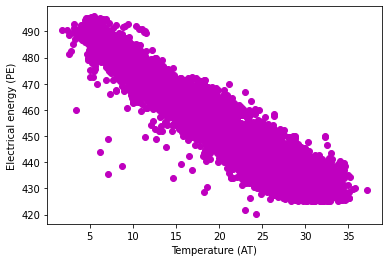

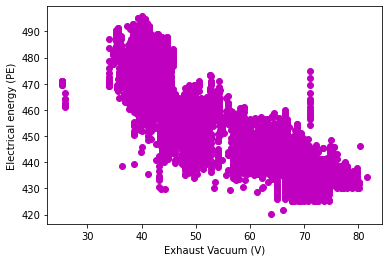

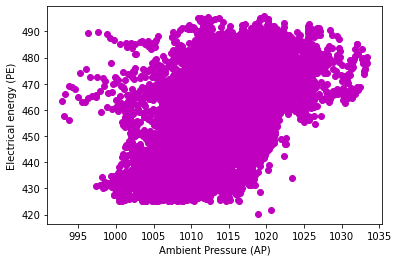

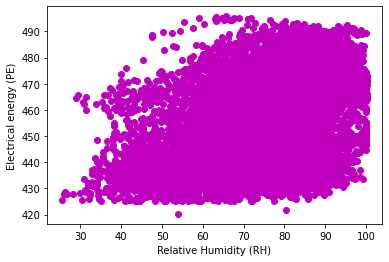

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x, y, x_train, x_test, y_train, y_test = load_data("/content/power_plant.xlsx")

In [ ]:
x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))
y_train = np.reshape(y_train, (6697, 1))
y_test = np.reshape(y_test, (2871, 1))
theta = np.zeros((x_train.shape[1], 1))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(theta.shape)

(6697, 5)
(2871, 5)
(6697, 1)
(2871, 1)
(5, 1)


In [ ]:
learning_rate = 0.1
num_epochs = 2850
theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)
J = cost_function(x_train, y_train, theta)
pred2 = h(x_test, theta)
print("Cost: ", J, '\n')
print("Parameters:\n", theta, '\n')
print("Prediction:\n", pred2[:10])

Cost:  [[10.6339581]] 

Parameters:
 [[ 4.54298479e+02]
 [-1.53472921e+01]
 [-2.45552946e+00]
 [ 4.61221406e-05]
 [-2.46180819e+00]] 

Prediction:
 [[445.0899623 ]
 [444.05774197]
 [448.95565705]
 [478.39729484]
 [467.98498071]
 [438.09637108]
 [483.54374813]
 [486.67591231]
 [445.05092472]
 [465.07790968]]


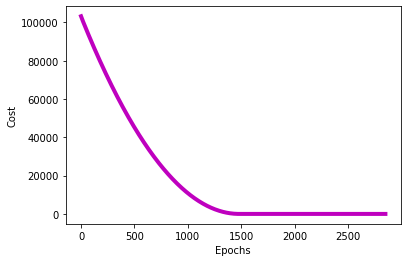

In [ ]:
#For testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

In [ ]:
for i in range(10):
  test(theta, x_test[i, 1:len(x_test)])
  print("Electrical energy output (Real):", y_test[i], '\n')

Electrical energy output (Prediction): [445.0899623]
Electrical energy output (Real): [441.61] 

Electrical energy output (Prediction): [444.05774197]
Electrical energy output (Real): [444.19] 

Electrical energy output (Prediction): [448.95565705]
Electrical energy output (Real): [445.27] 

Electrical energy output (Prediction): [478.39729484]
Electrical energy output (Real): [471.32] 

Electrical energy output (Prediction): [467.98498071]
Electrical energy output (Real): [471.96] 

Electrical energy output (Prediction): [438.09637108]
Electrical energy output (Real): [430.32] 

Electrical energy output (Prediction): [483.54374813]
Electrical energy output (Real): [483.56] 

Electrical energy output (Prediction): [486.67591231]
Electrical energy output (Real): [489.96] 

Electrical energy output (Prediction): [445.05092472]
Electrical energy output (Real): [444.1] 

Electrical energy output (Prediction): [465.07790968]
Electrical energy output (Real): [467.45] 



In [ ]:
def load_data_graph(filename):
  df = pd.read_excel(filename, header=0, index_col=False)
  data = np.array(df, dtype=float)
  x = data[:, :4]
  y = data[:, -1]
  normalize(data)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8)
  
  return x, y, x_train, x_test, y_train, y_test

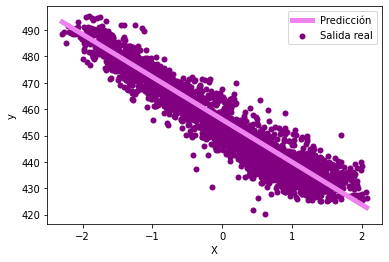

In [ ]:
#The input column that has the highest correlation with the output is taken into account.
x, y, x_train, x_test, y_train, y_test = load_data_graph("/content/power_plant.xlsx")
x1 = x_test[:, 0].max()
x2 = x_test[:, 0].min()
y1 = pred2.max()
y2 = pred2.min()
plt.scatter(x_test[:, 0], y_test, color='purple', linewidths=0.01, label='Salida real')
plt.plot([x1, x2], [y2, y1], color='violet', linewidth=5, label='Predicción')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
M2 = max_error(y_test, pred2)
MAE2 = mean_absolute_error(y_test, pred2)
MSE2 = mean_squared_error(y_test, pred2)
RMSE2 = np.sqrt(MSE2)
RSS2 = MSE2*len(pred2)
R2_2 = r2_score(y_test, pred2)

In [ ]:
print("Max Absolute Error:", M2)
print("Mean Absolute Error:", MAE2)
print("Mean Squared Error:", MSE2)
print("Root Mean Squared Error:", RMSE2)
print("Residual sum of squares:", RSS2)
print("Coefficient of Determination:", R2_2)

Max Absolute Error: 25.94084171534473
Mean Absolute Error: 3.5948498467410586
Mean Squared Error: 20.130702898902452
Root Mean Squared Error: 4.486725186469799
Residual sum of squares: 57795.24802274894
Coefficient of Determination: 0.9308451755546601


####**CONCLUSIONS**

1. The linear regression line fits good the model in the three cases.
2. Between the three models, the first (made with Scikit Learn) gives the best final result, with a coefficient of determination of 0.9312 (very close to 1), RMSE equal to 4.4749 and RSS of 57493.
3. The model made with the original optimizer gives a better final result and is more efficient in converging compared to the model that has the ADAM optimizer. However, the difference in the performance of both is not great, since the final cost of both is 10.54 and 10.63, respectively, with coefficients of determination of 0.9312 and 0.9308 (also very close to 1), RMSE values of 4.4751 and 4.4867, and RSS values of 57496 and 57795. 
4. As can be seen in the previous three points, the models were made and trained correctly, and the results with the three models were satisfactory.
5. The evaluation metrics implemented in this second point are appropriate for evaluating linear regression models.
6. In all three models, it can be seen that the difference between the real value and the predicted value is very small.

#### **REFERENCES**

1. https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902
2. https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc
3. https://www.youtube.com/watch?v=9IZ6OPQWtpw&t=288s
4. https://keras.io/api/optimizers/adam/
5. https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/